### Chapter 3.5
# Markov Process and Numerical Solution of State Probabilities
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

This script provides the solution of nonstationary and stationary Markov processes. In Python, this can be very efficiently solved. The Markov chain is described completely by the transition rate matrix $Q$ and an initial state $X(0)$.
* Nonstationary analysis: $X(t) = X(0) \cdot e^{tQ}$ <br> Implementation in Python `Xt = X0 @ expm(t*Q)` using [matrix exponential  `scipy.linalg.expm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html)
* Stationary analysis: $X\cdot Q=b \implies X = b \cdot Q^{-1}$ <br> Implementation in Python `X = b @ linalg.inv(Q)` using [matrix inverse  `scipy.lingalg.inv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html)


### Transition Rate Matrix $Q$
Let us create a transition rate matrix $Q$ first. The row-wise sum is zero.

In [18]:
import numpy as np
from matplotlib import pyplot as plt

Q = np.zeros((4,4))
Q[0,1] = 2
Q[0,2] = 3
Q[1,2] = 1
Q[2,3] = 1/2
Q[3,2] = 2
Q[3,1] = 1
Q[3,0] = 1/2
Q[2,1] = 1
Q[1,0] = 1

qi = -Q.sum(axis = 1) # row-wise sum
np.fill_diagonal(Q,qi) # set diagonal values
print(Q)

[[-5.   2.   3.   0. ]
 [ 1.  -2.   1.   0. ]
 [ 0.   1.  -1.5  0.5]
 [ 0.5  1.   2.  -3.5]]


## Kolmogorov Forward Equation for State Probabilities: Nonstationary Analysis
Now we compute the steady probabilities over time based on Kolmogorov forward equation. 

$\frac{d}{dt}X(t) = X(t)Q$

This can be solved with the matrix exponential $e^{tQ}$ and the initial state $X(0)$ at time $t=0$.

$
X(t) = X(0) \cdot e^{tQ}
$

The matrix exponential can be computed using [`scipy.linalg.expm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html).

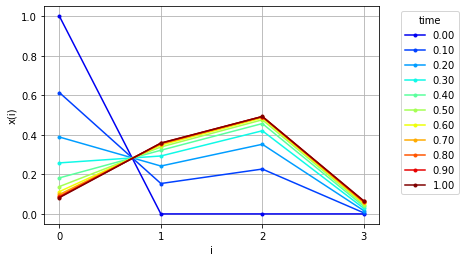

In [27]:
from matplotlib import pyplot as plt

#%% define times to be evaluated
T = np.linspace(0,1,11)
X = np.zeros((4,len(T)))
X[:,0] = [1, 0, 0, 0] # initialization: empty system

#%% matrix exponential
from scipy.linalg import expm

states = np.arange(len(x0))

cols = plt.cm.jet(np.linspace(0.1,1,len(T)))
for i,t in enumerate(T):   
    X[:,i] = X[:,0]@ expm(Q*t)
    plt.plot(states,X[:,i],'.-', color=cols[i,:], label=f'{t:.2f}')
plt.xlabel('i')
plt.ylabel('x(i)')
plt.legend(title='time', bbox_to_anchor=(1.05, 1))
plt.xticks(states)
plt.grid(which='major')

## Comparison with Steady State Probabilities
The steady state of the system is considered. Then, we obtain $X = \lim_{t \to \infty} X(t)$ and $ \lim_{t \to \infty} \frac{d}{dt}X(t)=0$. 

We solve the equation $XQ=0$ and consider $X e = 1$. Therefore, we replace one equation by changing the matrix $Q$ and use the vector $b=(0,\dots,0,1)$. Then, we need to solve $XQ=b$ which means $X=bQ^{-1}$ with the matrix inverse $Q^{-1}$. The matrix $Q$ can be inverted if the determinant is not equal to zero, $det(Q) \neq 0$.

In [30]:
#%% change the matrix and define vector b
Q2 = Q.copy()
Q2[:, -1] = 1

print(f'Q=\n{Q}\n')
print(f'Matrix is changed to\nQ2=\n{Q2}\n')

b = np.zeros(len(Q))
b[-1] = 1
print(f'b=\n{b}\n')

Q=
[[-5.   2.   3.   0. ]
 [ 1.  -2.   1.   0. ]
 [ 0.   1.  -1.5  0.5]
 [ 0.5  1.   2.  -3.5]]

Matrix is changed to
Q2=
[[-5.   2.   3.   1. ]
 [ 1.  -2.   1.   1. ]
 [ 0.   1.  -1.5  1. ]
 [ 0.5  1.   2.   1. ]]

b=
[0. 0. 0. 1.]



Now, we solve $X\cdot Q_2=b$ which means $X=b\cdot Q_2^{-1}$ with the matrix inverse $Q_2^{-1}$. The result is compared with the nonstationary analysis result for large $t$.

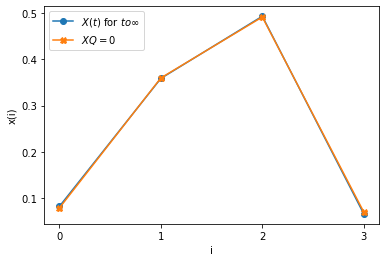

In [31]:
from scipy import linalg

myx = b @ linalg.inv(Q2) # compute the matrix inverse

plt.plot(states,X[:,-1],'o-', label='$X(t)$ for $t \to \infty$')
plt.plot(states,myx,'X-', label='$X Q = 0$')
plt.legend()
plt.xlabel('i')
plt.xticks(states)
plt.ylabel('x(i)')
plt.show()